In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

corr_01 = pd.read_csv('dataframes/corr_01.csv', na_values='')

numerical_df = corr_01.select_dtypes(include=[np.number])
numerical_df = numerical_df.dropna(axis=1)  # drop any columns with missing data

# prepare the data for the model
X = numerical_df.drop(['PCT_SE_A09005_008'], axis=1)  # feature columns
y = numerical_df['PCT_SE_A09005_008']  # target column

In [3]:
## Multi-OLS

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# predictor variables are stored in X and your target variable in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent value
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Conduct the multiple linear regression
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics of the regression model
print(model.summary())

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_sqr = model.rsquared

print(f'R square: {r_sqr}')
print(f'Root Mean Squared Error: {rmse}')

                            OLS Regression Results                            
Dep. Variable:      PCT_SE_A09005_008   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.176e+04
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:43:43   Log-Likelihood:            -1.2311e+05
No. Observations:               51452   AIC:                         2.462e+05
Df Residuals:                   51439   BIC:                         2.464e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1132      0

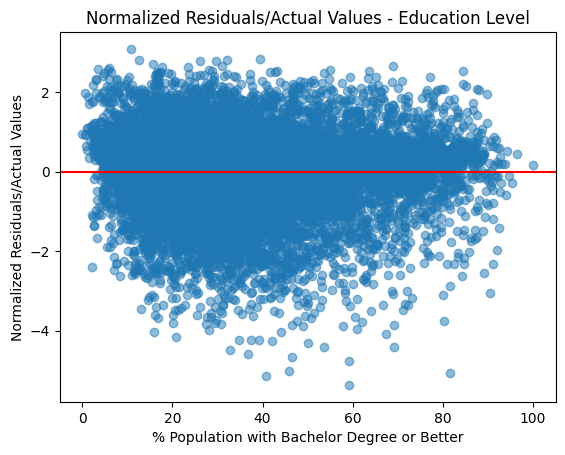

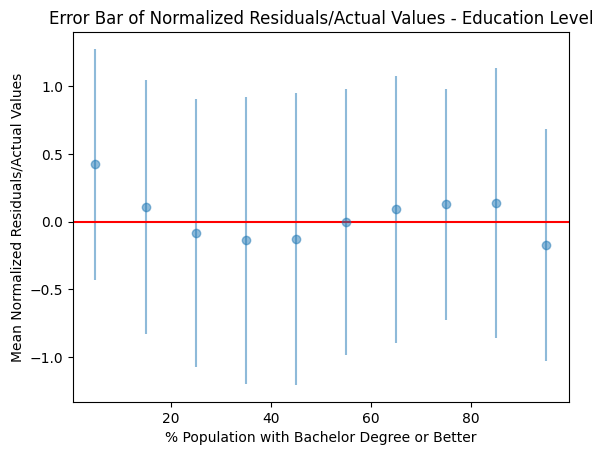

In [4]:
# Calculate residuals
residuals = y_test - y_pred
residuals_normalized_pre = residuals / y_test

# Normalize the residuals
scaler = StandardScaler()
residuals_normalized = scaler.fit_transform(residuals_normalized_pre.values.reshape(-1, 1))

# Convert normalized residuals back to pandas Series
residuals_normalized = pd.Series(residuals_normalized.flatten(), index=residuals_normalized_pre.index)

# variable names
title = 'Normalized Residuals/Actual Values - Education Level'
xlab = '% Population with Bachelor Degree or Better'
vardata = X_test['PCT_SE_B12001_004']

# Create a scatter plot of the normalized residuals
plt.scatter(vardata, residuals_normalized, alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title(title)
plt.show()

import numpy as np

# Define the number of bins
n_bins = 10

# Create bins for '% Population with Bachelor Degree or Better'
bins = pd.cut(vardata, bins=n_bins)

# Compute bin centers
bin_centers = (bins.cat.categories.right + bins.cat.categories.left) / 2

# Group by the bins and calculate the mean and standard deviation of the normalized residuals
mean_residuals = residuals_normalized.groupby(bins).mean()
std_residuals = residuals_normalized.groupby(bins).std()

# Create a DataFrame that stores the bin centers, mean residuals, and standard deviation of the residuals
data = pd.DataFrame({
    'BinCenters': bin_centers,
    'MeanResiduals': mean_residuals,
    'StdResiduals': std_residuals
}).dropna()

# Plot the mean normalized residuals for each bin as points with error bars
plt.errorbar(data['BinCenters'], data['MeanResiduals'], yerr=data['StdResiduals'], fmt='o', alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Mean Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title('Error Bar of ' + title)
plt.show()